In [1]:
import pandas as pd
import numpy as np
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from matplotlib import colors as mcolors
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
ingredient_info = pd.read_csv('./data/INGREDIENT_INFO_modify.csv')
ingredient_info.head()

,ID,RECIPE_ID,RECIPE_TITLE,INGREDIENT,COUNT,CATEGORY
0,1,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,오리고기,6,오리고기
1,2,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,짜장라면,4,면류
2,3,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,기름,4,유지류
3,4,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,물,7,가공식품
4,5,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,짜장,1,즉석식품


In [3]:
model = Word2Vec.load('recipe_word2vec.model')

In [4]:
word_vectors = model.wv
word_vectors['꿀']

array([-2.0246387 ,  0.14778249, -0.09873753, -0.6968755 ,  0.20227543,
       -0.23868263, -0.2997229 , -0.16934897,  0.96131563,  0.1105566 ,
       -0.9779315 , -1.8183545 , -0.60922164,  2.0960972 ,  0.25574288,
       -2.8946745 , -1.1988611 , -0.29045513, -0.8901439 ,  2.9080727 ,
       -0.593747  , -1.5590836 , -0.41593775,  0.02183047,  1.9425067 ,
       -0.89482474,  0.02694695, -0.12999806,  2.2888632 ,  0.93546456,
       -0.35936314, -1.811389  , -0.17501184,  1.7863842 ,  1.9806703 ,
       -1.9675153 , -0.46211195, -0.15160061, -0.33674052, -0.21978964,
        0.76204455, -2.8227577 ,  0.880637  , -0.20260967,  0.98654485,
        0.7616897 , -0.56576836, -0.46531963,  0.64015114,  0.7597645 ,
       -1.7809031 , -0.42570105,  3.956234  , -2.0385675 ,  0.24230854,
        1.6726209 , -3.5889306 ,  1.5691845 ,  0.7353668 , -2.1300108 ,
       -0.8841773 , -0.23167494,  1.3348324 ,  0.4187965 , -0.3203771 ,
        0.11290104, -1.4249457 ,  2.8161619 ,  0.10667656,  0.27

In [5]:
data = []
data_title = []

In [6]:
title = ingredient_info['RECIPE_TITLE']
count = ingredient_info['COUNT']
ingredient = ingredient_info['INGREDIENT']
recipe_id = ingredient_info['RECIPE_ID']
prev_id = recipe_id[0]
tmp = np.array(word_vectors[ingredient[0]])
for i in range(len(recipe_id)):
    if prev_id != recipe_id[i]:
        tmp = list(tmp)
        data_title.append(title[i - 1])
        data.append(tmp)
        try:
            tmp = np.array(word_vectors[ingredient[i]]) * count[i]
        except:
            tmp = np.array([0] * 100)
            print(ingredient[i] + ' is not in vector')
    else:
        try:
            tmp = tmp + np.array(word_vectors[ingredient[i]]) * count[i]
        except:
            print(ingredient[i] + ' is not in vector')
    prev_id = recipe_id[i]
    if(i%100000 == 0):
        print(i,"번째 실행")

0 번째 실행
랍스타 is not in vector
머쉬룸 is not in vector
달고기 is not in vector
머쉬룸 is not in vector
부세 is not in vector
옻순 is not in vector
상어 is not in vector
국자가리비 is not in vector
국자가리비 is not in vector
국자가리비 is not in vector
나또 is not in vector
나또 is not in vector
노가리 is not in vector
부세 is not in vector
마요 is not in vector
락교 is not in vector
100000 번째 실행
생선까스 is not in vector
생선까스 is not in vector
홍초 is not in vector
마요 is not in vector
락교 is not in vector
전갱이 is not in vector
홍초 is not in vector
건빵 is not in vector
홍초 is not in vector
미꾸라지 is not in vector
전갱이 is not in vector
부세 is not in vector
붕어 is not in vector
세꼬시 is not in vector
요구루트 is not in vector
머쉬룸 is not in vector
동동주 is not in vector
랍스타 is not in vector
쥐치 is not in vector
영지버섯 is not in vector
락교 is not in vector
미꾸라지 is not in vector
영지버섯 is not in vector
200000 번째 실행
노가리 is not in vector
부세 is not in vector
노가리 is not in vector
참다래 is not in vector
랍스타 is not in vector
미꾸라지 is not in vector
동동주 is not in vector
쥐치 is

In [7]:
df_data = pd.DataFrame(data, index = data_title)

In [8]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,4.326441,-16.285069,9.400759,-19.856100,6.681127,3.608819,-1.036333,7.861939,-16.960413,-6.431215,...,17.407789,-11.451414,9.288183,-13.164365,19.430294,22.841715,9.301089,19.847286,-9.938553,18.877031
69레시피 불고기 소고기볶음반찬,31.173626,0.395565,25.810261,0.276100,35.615299,-14.465343,4.454515,9.567307,-17.457373,-30.596891,...,64.318863,-8.132983,46.928715,18.842878,65.296448,32.320591,-15.798482,44.728043,-13.991407,-8.203461
풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬,18.242760,-24.231026,12.954057,-7.506955,20.432314,-13.188568,8.523022,0.396392,-14.796564,-23.230328,...,19.409775,-10.121034,22.975983,22.749756,44.293705,26.522118,3.884156,21.539444,-15.415035,-4.570863
최애반찬 소시지 감자조림,18.805233,30.209118,32.722580,-30.073032,25.357197,-6.782855,26.200068,-1.360065,-21.070032,-16.251177,...,93.976891,7.930943,39.467152,20.003960,49.659515,61.183792,-14.949378,66.623581,-17.322384,14.538493
버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,5.292377,-4.587755,2.791307,15.125306,0.921277,2.239694,1.023006,-5.418491,-3.522961,-7.852964,...,26.510689,6.783621,20.877310,3.130389,4.725234,18.611607,-5.001421,9.631208,-3.184484,-4.314406


In [9]:
df_data.to_csv('recipe_ingredient_word2vec.csv')

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df_data)

output = min_max_scaler.transform(df_data)
output = pd.DataFrame(output, columns=df_data.columns, index=list(df_data.index.values))
print(output.head())

                                         0         1         2         3   \
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식         0.387091  0.287558  0.515111  0.364831   
69레시피 불고기 소고기볶음반찬                  0.450731  0.314192  0.561926  0.414126   
풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬         0.420079  0.274870  0.525248  0.395068   
최애반찬 소시지 감자조림                      0.421412  0.361796  0.581646  0.339814   
버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기  0.389381  0.306235  0.496255  0.450485   

                                         4         5         6         7   \
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식         0.398358  0.814176  0.634952  0.614072   
69레시피 불고기 소고기볶음반찬                  0.474969  0.778208  0.651814  0.619467   
풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬         0.434768  0.780749  0.664308  0.590453   
최애반찬 소시지 감자조림                      0.447808  0.793497  0.718592  0.584896   
버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기  0.383107  0.811451  0.641276  0.572057   

                                         8         9   ...        90  \
밥솥

In [12]:
from sklearn.cluster import KMeans
clusters=40
kmeans = KMeans(init="k-means++", n_clusters=clusters, random_state=0)
kmeans.fit(output)

KMeans(n_clusters=40, random_state=0)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(data)

pca_data = pd.DataFrame(pca.transform(data))

In [14]:
from matplotlib import colors as mcolors
import math

colors = list(zip(*sorted((
    tuple(mcolors.rgb_to_hsv(
        mcolors.to_rgba(color)[:3])), name) for name, color in dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).items())))[1]

skips = math.floor(len(colors[20:-20])/clusters)
cluster_colors = colors[20:-20:skips]

In [15]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
          c=list(map(lambda label: cluster_colors[label], kmeans.labels_)))

str_labels = list(map(lambda label: '% s' % label, kmeans.labels_))

list(map(lambda data1, data2, data3, str_label:
        ax.text(data1, data2, data3, s=str_label, zorder = 0, color='k'), pca_data[0], pca_data[1], pca_data[2], str_labels))

for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.show()

<IPython.core.display.Javascript object>

In [16]:
recipeLabels = list(zip(output.index, kmeans.labels_))
print(recipeLabels[0])

('밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식', 20)


In [17]:
import csv

with open('./recipe_word2vec_labels.csv', encoding='utf-8', mode='w', newline='') as f:
    writer = csv.writer(f)
    for data in recipeLabels:
        writer.writerow(data)

In [18]:
def elbowMethod(start, end, step, data):
    sse = []
    clusters=list(range(start, end, step))

    for k in clusters:
        kmeans = KMeans(init="k-means++", n_clusters=k, random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(6, 6))
    plt.plot(clusters, sse, '-o')
    plt.xlabel(r'Number of clusters *k*')
    plt.ylabel('Sum of squared distance')

<IPython.core.display.Javascript object>


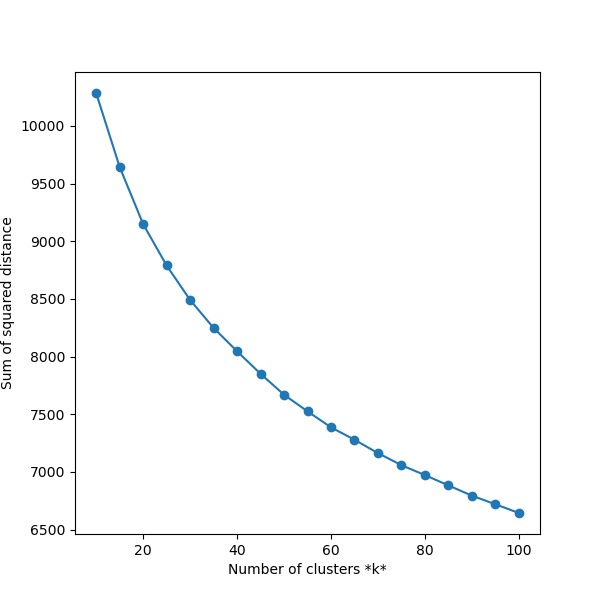

In [27]:
elbowMethod(10, 101, 5, output)

In [28]:
for data in recipeLabels:
    if data[1] == 4:
        print(data)

('두부강정 맵지않은 소스로 아이들 입맛까지 확 ', 4)
('두부시금치무침 이 레시피가 제일 맛있네요', 4)
('쫄깃하고 맛있는 두부볶음 레시피!다이어트 요리로도 좋아요', 4)
('두부강정 만드는 법, 아이들이 좋아하는 반찬!!', 4)
('소고기두부볶음 - 아이들 반찬/이유식 반찬으로도 최고죠옛생각이 절로...', 4)
('간단 자취요리 두부를 쫄깃한 고기식감으로 만들기! 두부탕수 만들기', 4)
('두부 강정..', 4)
('양념장이 참 맛있는 두부조림', 4)
('근사한 두부가지구이', 4)
('쫄깃한 두부강정 만들기', 4)
('일본 두부튀김 아게다시도후 홈파티음식', 4)
('두부 옷을 입은 참치! 흔한 재료로 근사하게! 참치두부전', 4)
('아이가 좋아하는 초간단 반찬 간장두부조림 w.초록마을 국산콩으로 만든 부침이두부', 4)
('두부 감자조림-제철 맞은 감자와 두부의 맛 좋아요', 4)
('국물까지 싹싹 비벼먹게 만드는 마성의맛 두부조림', 4)
('매콤 칼칼 우삼겹살 두부조림 혼밥 안주로 최고 ', 4)
('아이반찬 달콤 짧짤 바삭 부드러운 두부강정', 4)
('다이어트 요리 담백한 두부 스테이크', 4)
('두부두루치기 만드는법 두부요리 대전식으로 만들기', 4)
('간장 두부조림 간단하게 만드는 밑반찬 !', 4)
('매콤달콤 두부요리  두부 깐풍기 / 집에서 즐기는 중식요리', 4)
('두부강정 새콤 달콤 매콤한 두부강정 만들어볼까요 -양싸', 4)
('노른자를 터트려 먹는 - 오늘뭐먹지? 신동엽 두부조림', 4)
('두부 간장조림-아이도 좋아하는 두부 간장조림 만들기!', 4)
('고기소를 넣은 두부조림', 4)
('요리 뚝배기두부조림, 오늘뭐먹지 신동엽 레시피', 4)
('밥반찬, 술안주 담백한 두부로 만든 매콤달콤 두부강정  닭강정 대신 두부강정', 4)
('두반장 없이 연두부로 만드는 다이어트용 새우 마파두부', 4)
('두부구이와 참나물무침', 4)
('두부조림 황금레시피 양념장 이거지', 4)
('두부강정 - 견과류두부강

In [29]:
for data in recipeLabels:
    if data[1] == 5:
        print(data)

('고기처럼 쫄깃한 밥도둑 반찬 새송이버섯 간장버터구이레시피', 5)
('즉석 목살 양념구이 달큰한 양념소스가 정말 맛있습니다.', 5)
('단짠단짠의 대패덮밥', 5)
('치킨너겟으로 간편하게 간장치킨 만들기', 5)
('부타동  일본식 돼지고기 덮밥 간단한 점심 메뉴로 굿! ', 5)
('달콤 짭조름 떡 베이컨 간장조림', 5)
('차돌박이 파스타 ', 5)
('우리 집 최애 반찬 달콤 짭조름한 닭안심감자조림', 5)
('대파 닭안심 조림', 5)
('초간단 아이반찬 오징어간장조림 아이밑반찬으로 좋아요', 5)
('우리집 최애 반찬 마늘아몬드조림 레시피', 5)
('짭조름 간장 쏘야', 5)
('간단하게 양송이 버섯 덮밥', 5)
('나시고랭 숙주로 간단한 나시고랭 볶음밥', 5)
('대패삼겹살 숙주볶음 파채넣고 더 맛있게', 5)
('가지등심카나페', 5)
('부드럽고 먹기 좋은 닭다리살 치즈밥', 5)
('다른 반찬이 필요없는 매운 어묵 비빔밥', 5)
('뼈없는 소고기찜', 5)
('버섯요리/조금 색다르게 만들어 먹는 버섯 깐풍', 5)
('대패삼겹살 영양부추 샐러드', 5)
('돼지목살 떡조림!! 세상에서 제일 맛있는 떡조림을 소개합니다!! 호불호 없는 단짠을 완벽하게 구현했습니다!', 5)
('갈릭치킨, 매력있는 맛일세 ', 5)
('교촌치킨 따라잡기', 5)
('꼭 해드세요. 존맛임! 버터 스팸동 만들기', 5)
('두부강정 ,두부반찬, 아이반찬 ', 5)
('우삼겹볶음 만들기 밥도둑 여기있었네', 5)
('맥주와 환상궁합! 백종원 칠리새우 쉽게 만들기', 5)
('아이 간장 떡볶이 ', 5)
('10분 완성 꿀레시피 마늘 불고기 간단하고 맛있게!', 5)
('초간단전자렌지로 꽈리고추찜 만들기', 5)
('돼지다짐육으로만든새송이 떡갈비', 5)
('깐풍만두', 5)
('크리스마스날 어울리는 칵테일 새우 청경채 볶음', 5)
('술안주 끝판왕 항정살조림! 10분안에 끝!', 5)
('삼겹살 간장조림 황금레시피', 5)
('느타리버섯양념구이', 5)

('무생채 만드는법', 5)
('김밥에 넣을 짭쪼름한 우엉조림', 5)
('냉장고를 부탁해 오세득 닭고치, 술안주로 따악!', 5)
('데리야끼소스 메로스테이크 간단한 메로요리', 5)
('돼지고기강정 - 내안에 인삼있다', 5)
('초간단 버섯육개장 만들기! ', 5)
('자취생의 배고픈 새벽에 간장비빔국수 만들어 먹기 ', 5)
('칼슘의 왕중왕실치고추장볶음뱅어', 5)
('두부요리남은 찬밥도 맛있게 만들어주는 밥도둑 마파 두부', 5)
('두반장 소고기 볶음', 5)
('달콤한 떡갈비스테이크 w함평천지한우쇼핑몰', 5)
('명란 쌈장 ,된장 쌈장', 5)
('닭가슴살로 만드는 궁중떡볶이', 5)
('인삼을 품은 브레이징 삼겹살과 인삼프라이, 사과쳐트니, 감자퓨레', 5)
('삼삼한 쌀전병 삼계 말이', 5)
('김풍의 너마늘 위한 치킨 - 냉장고를 부탁해 166회', 5)
('고급스런 초대요리쇠고기 수삼 찹쌀 말이', 5)
('해물짜장 덮밥 만드는 법', 5)
('정지선의 돔레이더 - 냉장고를 부탁해 166회', 5)
('삼계부꾸미', 5)
('돼지고기 목살 불고기', 5)
('귤 소스를 곁들인 인삼 떡갈비', 5)
('멸치볶음', 5)
('양파불고기불고기양념공식대로 만들어 먹어요', 5)
('백종원 가지밥 너무 매력적이야', 5)
('해물등뼈찜', 5)
('찬찬찬 대박 반찬 쇠고기 메추리알 장조림 황금레시피 ', 5)
('아몬드파인애플 현미볶음밥겨울방학두뇌음식3', 5)
('쌈장 황금레시피 엄빠표 재료들로 비법 쌈장 만들기', 5)
('삼삼하닭인삼 닭다리오븐구이 ', 5)
('고등어조림 비린내 확잡는 양념 레시피 !!', 5)
('갈비집보다 더 푸짐하고 맛있게 집에서 외식하는...엄마표 숯불돼지갈비', 5)
('우엉채볶음베란다에서 얼어버린 우엉 구하기', 5)
('입맛없을 때 곤드레밥 - 딸에게 / 곤드레밥만드는법', 5)
('민어 볼살 콩나물찜', 5)
('매콤한 닭고기 간장조림 ', 5)
('치킨덮밥 만드는 법', 5)
('초간단 꽁치조림만들기', 

('정창욱의 삼겹살 플레이트 - 냉장고를 부탁해 3회', 5)
('박순이의 어리굴젓- 살림 9단의 만물상 217회', 5)
('입맛 돋워주는 느타리버섯풋마늘무침', 5)
('소고기무국 소고기탕국 만들기', 5)
('동파육 만들기 향이 좋아요', 5)
('백종원의 고추장 통오징어 구이 - 마이리틀텔레비전 9회', 5)
('호두의 풍미를 더한 흑초돼지고기 볶음', 5)
('신선한 채소와 함께 야들야들하게삼겹살볶음', 5)
('쭈꾸미 볶음', 5)
('건새우볶음아삭하고 고소하고 밑반찬으로 딱이네요!', 5)
('요리에 한수!! 생강술 만들기', 5)
('든든한 밑반찬 연근소고기장조림 별미군', 5)
('내가 만들고 감탄한 신림백순대 엉터리 황금레시피', 5)
('파김치 맛있게 담그는법누구나 할 수 있어요', 5)
('마늘간장치킨 만들기', 5)
(' 제육볶음  매콤달콤한 맛에 빠져보아요', 5)
('백종원의 가지볶음 - 집밥백선생 11회 ', 5)
('내맘대로 만드는 단짠 닭봉조림', 5)
('삼색 북어 보푸라기', 5)
('계피향 돼지고기장조림', 5)
('새우젓 닭볶음탕 술안주로도 딱 좋아요', 5)
('닭강정 매콤달콤 닭강정 끝내주게 맛있어요', 5)
('생강술 담기 정말 쉬워요', 5)
('한접시만 먹어도 영양이 듬뿍 돼지고기마늘소스구이와 상추겆절이', 5)
('한방족수육탕', 5)
('고소한 닭죽끓이기!!!', 5)
('가을하면 빼놓으면 섭한 새우장간장새우', 5)
('죽순채', 5)
('먹는즐거움이 두배 등갈비강정', 5)
('초간단 담백한  서대찜 - 딸에게', 5)
('메추리알장조림 다오네만능간장으로 간단하게 만드는법', 5)
('호두 마늘 조림고소하고 양양 많은 조림', 5)
('생오징어김치', 5)
('김치볶음밥', 5)
('패밀리레스토랑을 집에서바베큐립만들기  바베큐립소스만들기 / 바베큐립만드는법 / 등갈비바베큐만들기 / 등갈비요리 ', 5)
('집에서 구워먹는 LA양념 갈비구이', 5)
('가지만있으면돼 간단하지만 넘 맛있는 가지구이', 5)
